# Data Cleaning
Basic Steps for Data Cleaning

1. Remove duplicate or irrelevant observations
2. Fix structural Errors(Naming Conventions, Typo, N/A, Incorrect Capitalizations)
3. Handle unwanted Outliers
4. Handle missing Data

https://www.tableau.com/learn/articles/what-is-data-cleaning

In [2]:
import pandas as pd

In [3]:
# reading data from csv
data = pd.read_csv("../data/georgia-history.csv")
data.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,GA,17906.0,15598.0,1,2308.0,56797.0,56797.0,2008.0,35,...,7359069,18827,482568.0,1484921.0,NaN,NaN,NaN,0,7359069,18827
1,2021-03-06,GA,17905.0,15597.0,90,2308.0,56762.0,56762.0,2071.0,135,...,7340242,24765,481545.0,1478232.0,NaN,NaN,NaN,0,7340242,24765
2,2021-03-05,GA,17815.0,15526.0,65,2289.0,56627.0,56627.0,2099.0,115,...,7315477,35861,480456.0,1463362.0,NaN,NaN,NaN,0,7315477,35861
3,2021-03-04,GA,17750.0,15462.0,125,2288.0,56512.0,56512.0,2191.0,143,...,7279616,28189,479300.0,1451169.0,NaN,NaN,NaN,0,7279616,28189
4,2021-03-03,GA,17625.0,15349.0,145,2276.0,56369.0,56369.0,2299.0,118,...,7251427,16983,478229.0,1437822.0,NaN,NaN,NaN,0,7251427,16983


In [4]:
data = data.set_index('date')

In [5]:
# Let's find out the number of rows and columns
data.shape

(369, 40)

## 1. Remove duplicate or irrelevant observations

In [6]:
data.nunique()

state                                 1
death                               354
deathConfirmed                      123
deathIncrease                       124
deathProbable                       104
hospitalized                        347
hospitalizedCumulative              347
hospitalizedCurrently               294
hospitalizedIncrease                232
inIcuCumulative                     313
inIcuCurrently                        0
negative                              0
negativeIncrease                      1
negativeTestsAntibody                 0
negativeTestsPeopleAntibody           0
negativeTestsViral                    0
onVentilatorCumulative                0
onVentilatorCurrently                 0
positive                            367
positiveCasesViral                  312
positiveIncrease                    357
positiveScore                         1
positiveTestsAntibody               278
positiveTestsAntigen                 18
positiveTestsPeopleAntibody           0


In [7]:
# Remove the column which has less than one distinct element

data=data.loc[:,data.nunique()>1]
data.head()

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,positive,...,positiveTestsAntigen,positiveTestsViral,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
date,,,,,,,,,,,,,,,,,,,,,
2021-03-07,17906.0,15598.0,1,2308.0,56797.0,56797.0,2008.0,35,9263.0,1023487,...,168867.0,803515,7359069,18827,482568.0,1484921.0,NaN,0,7359069,18827
2021-03-06,17905.0,15597.0,90,2308.0,56762.0,56762.0,2071.0,135,9260.0,1021778,...,168005.0,802411,7340242,24765,481545.0,1478232.0,NaN,0,7340242,24765
2021-03-05,17815.0,15526.0,65,2289.0,56627.0,56627.0,2099.0,115,9236.0,1019509,...,166895.0,801097,7315477,35861,480456.0,1463362.0,NaN,0,7315477,35861
2021-03-04,17750.0,15462.0,125,2288.0,56512.0,56512.0,2191.0,143,9221.0,1017428,...,166192.0,799666,7279616,28189,479300.0,1451169.0,NaN,0,7279616,28189
2021-03-03,17625.0,15349.0,145,2276.0,56369.0,56369.0,2299.0,118,9186.0,1014542,...,165060.0,798161,7251427,16983,478229.0,1437822.0,NaN,0,7251427,16983


In [8]:
data.isna().sum()

death                              9
deathConfirmed                   244
deathIncrease                      0
deathProbable                    244
hospitalized                      21
hospitalizedCumulative            21
hospitalizedCurrently             58
hospitalizedIncrease               0
inIcuCumulative                   54
positive                           0
positiveCasesViral                56
positiveIncrease                   0
positiveTestsAntibody             90
positiveTestsAntigen             351
positiveTestsViral                 0
totalTestResults                   0
totalTestResultsIncrease           0
totalTestsAntibody                84
totalTestsAntigen                351
totalTestsPeopleViral            362
totalTestsPeopleViralIncrease      0
totalTestsViral                    0
totalTestsViralIncrease            0
dtype: int64

In [9]:
column_drop = ['deathProbable', 'deathConfirmed','positiveTestsAntibody','positiveTestsAntigen','totalTestResults','totalTestResultsIncrease','totalTestsAntibody','totalTestsAntigen','totalTestsPeopleViral','totalTestsPeopleViralIncrease','totalTestsViral','totalTestsViralIncrease']
data_relevant = data.drop(column_drop, axis=1)

In [10]:
data_relevant.head()

,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,positive,positiveCasesViral,positiveIncrease,positiveTestsViral
date,,,,,,,,,,,
2021-03-07,17906.0,1,56797.0,56797.0,2008.0,35,9263.0,1023487,828336.0,1709,803515
2021-03-06,17905.0,90,56762.0,56762.0,2071.0,135,9260.0,1021778,827397.0,2269,802411
2021-03-05,17815.0,65,56627.0,56627.0,2099.0,115,9236.0,1019509,826117.0,2081,801097
2021-03-04,17750.0,125,56512.0,56512.0,2191.0,143,9221.0,1017428,824804.0,2886,799666
2021-03-03,17625.0,145,56369.0,56369.0,2299.0,118,9186.0,1014542,823008.0,2735,798161


In [11]:
# Looking into datsets, to find the increase in number of deaths, hospitalized and positive test results relative to time. We can just consider these columns [deathIncrease,hospitalizedIncrease,positiveIncrease]
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html

death_increase = data_relevant['death'].diff(periods=-1)
hospitalized_increase = data_relevant['hospitalized'].diff(periods=-1)
positive_increase = data_relevant['positive'].diff(periods=-1)




<AxesSubplot:xlabel='date'>

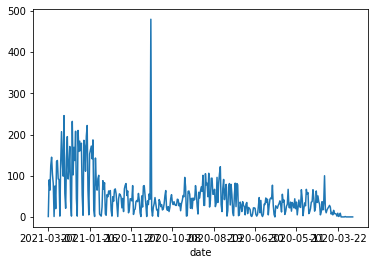

In [12]:
data_relevant['deathIncrease'].plot()

<AxesSubplot:xlabel='date'>

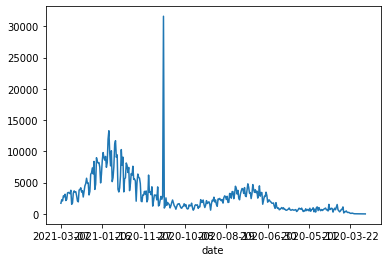

In [13]:
data_relevant['positiveIncrease'].plot()

<AxesSubplot:xlabel='date'>

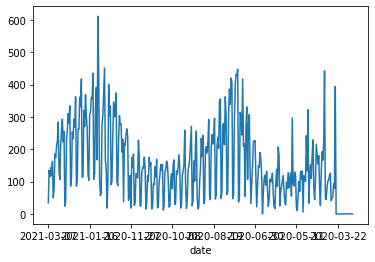

In [14]:
data_relevant['hospitalizedIncrease'].plot()

## 2. Fix Structural Errors

### 2.1 Cleaning missing values (N/A)

1. Remove the rows that have missing value
2. Replacing the missing values

In [15]:
# Let's find if there are any N/A
data_relevant.isna().any()

death                      True
deathIncrease             False
hospitalized               True
hospitalizedCumulative     True
hospitalizedCurrently      True
hospitalizedIncrease      False
inIcuCumulative            True
positive                  False
positiveCasesViral         True
positiveIncrease          False
positiveTestsViral        False
dtype: bool

In [16]:
#Let's find how many N/A values are there in each column
data_relevant.isna().sum()

death                      9
deathIncrease              0
hospitalized              21
hospitalizedCumulative    21
hospitalizedCurrently     58
hospitalizedIncrease       0
inIcuCumulative           54
positive                   0
positiveCasesViral        56
positiveIncrease           0
positiveTestsViral         0
dtype: int64

In [17]:
 # Let's look at the rows where death value is na
data_relevant.loc[data_relevant['death'].isna()==True,:]

,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,positive,positiveCasesViral,positiveIncrease,positiveTestsViral
date,,,,,,,,,,,
2020-03-12,NaN,0,NaN,NaN,NaN,0,NaN,31,NaN,9,7
2020-03-11,NaN,0,NaN,NaN,NaN,0,NaN,22,NaN,5,4
2020-03-10,NaN,0,NaN,NaN,NaN,0,NaN,17,NaN,5,2
2020-03-09,NaN,0,NaN,NaN,NaN,0,NaN,12,NaN,5,1
2020-03-08,NaN,0,NaN,NaN,NaN,0,NaN,7,NaN,1,0
2020-03-07,NaN,0,NaN,NaN,NaN,0,NaN,6,NaN,4,0
2020-03-06,NaN,0,NaN,NaN,NaN,0,NaN,2,NaN,0,0
2020-03-05,NaN,0,NaN,NaN,NaN,0,NaN,2,NaN,0,0
2020-03-04,NaN,0,NaN,NaN,NaN,0,NaN,2,NaN,0,0


In [18]:
data_relevant.shape

(369, 11)

In [19]:
# Lets' remove the data where we do not have any information about death
data_relevant = data_relevant.loc[data_relevant['death'].isna()==False,:]

In [20]:
# We can see there are no data with N/A values on death column
data_relevant.loc[data_relevant['death'].isna()==True,:]

,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,positive,positiveCasesViral,positiveIncrease,positiveTestsViral
date,,,,,,,,,,,


In [21]:
data_relevant.isna().sum()

death                      0
deathIncrease              0
hospitalized              12
hospitalizedCumulative    12
hospitalizedCurrently     49
hospitalizedIncrease       0
inIcuCumulative           45
positive                   0
positiveCasesViral        47
positiveIncrease           0
positiveTestsViral         0
dtype: int64

In [22]:
data_relevant.shape

(360, 11)

In [23]:
# Let's save this data to pickle format
data_relevant.to_pickle('../data/georgia-history.pkl')

## 3. Finding Outliers and handling the outliers

One way to find the outliers in dataset is using boxplot

<AxesSubplot:>

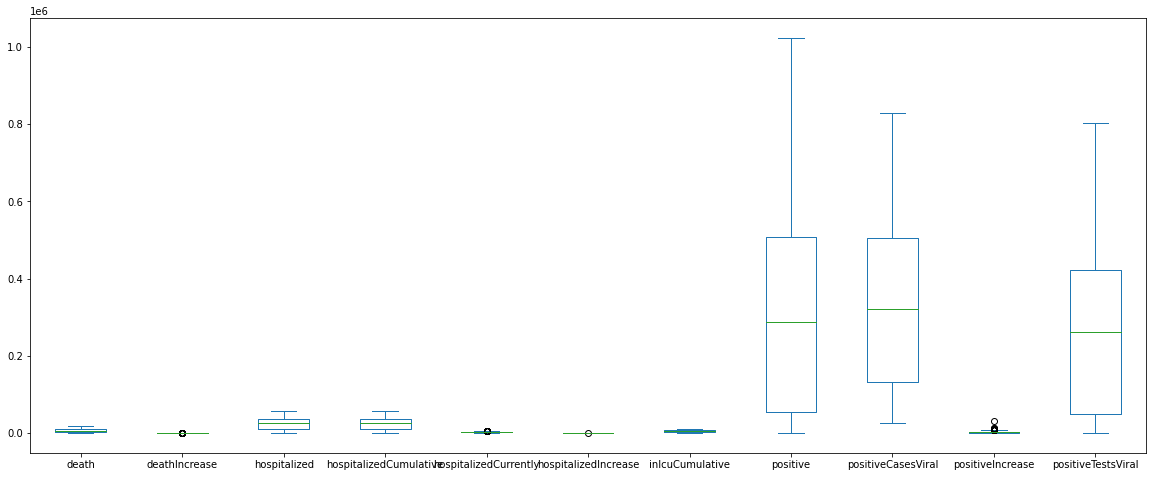

In [24]:
data_relevant.plot.box(figsize=(20, 8))

<AxesSubplot:>

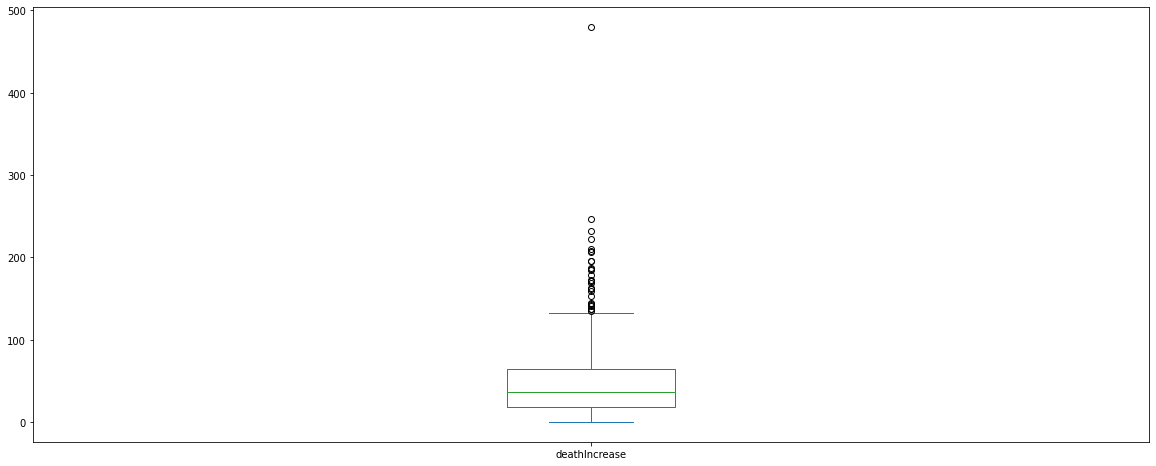

In [25]:
data_relevant['deathIncrease'].plot.box(figsize=(20, 8))

<AxesSubplot:ylabel='Frequency'>

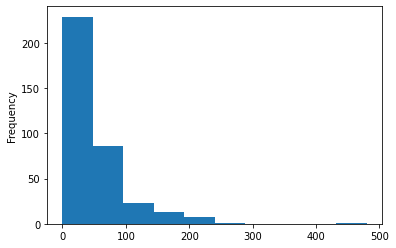

In [26]:
data_relevant['deathIncrease'].plot.hist()

In [27]:
data_relevant['deathIncrease'].max()

480

## 4. Handle missing data

In [28]:
data_relevant.head()

,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,positive,positiveCasesViral,positiveIncrease,positiveTestsViral
date,,,,,,,,,,,
2021-03-07,17906.0,1,56797.0,56797.0,2008.0,35,9263.0,1023487,828336.0,1709,803515
2021-03-06,17905.0,90,56762.0,56762.0,2071.0,135,9260.0,1021778,827397.0,2269,802411
2021-03-05,17815.0,65,56627.0,56627.0,2099.0,115,9236.0,1019509,826117.0,2081,801097
2021-03-04,17750.0,125,56512.0,56512.0,2191.0,143,9221.0,1017428,824804.0,2886,799666
2021-03-03,17625.0,145,56369.0,56369.0,2299.0,118,9186.0,1014542,823008.0,2735,798161


In [29]:
data_relevant.isnull().sum()

death                      0
deathIncrease              0
hospitalized              12
hospitalizedCumulative    12
hospitalizedCurrently     49
hospitalizedIncrease       0
inIcuCumulative           45
positive                   0
positiveCasesViral        47
positiveIncrease           0
positiveTestsViral         0
dtype: int64

In [36]:
data_relevant.loc[data_relevant['hospitalized'].isnull()==True,:]

,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,positive,positiveCasesViral,positiveIncrease,positiveTestsViral
date,,,,,,,,,,,
2020-03-24,32.0,7,NaN,NaN,NaN,0,NaN,1026,NaN,254,1092
2020-03-23,25.0,2,NaN,NaN,NaN,0,NaN,772,NaN,172,905
2020-03-22,23.0,9,NaN,NaN,NaN,0,NaN,600,NaN,93,698
2020-03-21,14.0,1,NaN,NaN,NaN,0,NaN,507,NaN,87,582
2020-03-20,13.0,3,NaN,NaN,NaN,0,NaN,420,NaN,133,460
2020-03-19,10.0,9,NaN,NaN,NaN,0,NaN,287,NaN,90,352
2020-03-18,1.0,0,NaN,NaN,NaN,0,NaN,197,NaN,51,246
2020-03-17,1.0,0,NaN,NaN,NaN,0,NaN,146,NaN,25,185
2020-03-16,1.0,0,NaN,NaN,NaN,0,NaN,121,NaN,22,100


In [ ]:
# Example 2: Read the meminfo.pkl file you saved and remove the columns that have less than one distinct values. 
# Save the dataframe to pickle format 

In [ ]:
# Example 3: Find all the rows where death increase in greater than 50 

In [39]:
data_relevant.loc[data_relevant['deathIncrease']>50,:]

,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,positive,positiveCasesViral,positiveIncrease,positiveTestsViral
date,,,,,,,,,,,
2021-03-06,17905.0,90,56762.0,56762.0,2071.0,135,9260.0,1021778,827397.0,2269,802411
2021-03-05,17815.0,65,56627.0,56627.0,2099.0,115,9236.0,1019509,826117.0,2081,801097
2021-03-04,17750.0,125,56512.0,56512.0,2191.0,143,9221.0,1017428,824804.0,2886,799666
2021-03-03,17625.0,145,56369.0,56369.0,2299.0,118,9186.0,1014542,823008.0,2735,798161
2021-03-02,17480.0,104,56251.0,56251.0,2348.0,162,9158.0,1011807,821482.0,3147,797157
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-27,971.0,59,4681.0,4681.0,NaN,322,1057.0,23913,NaN,512,20557
2020-04-21,799.0,66,3779.0,3779.0,NaN,229,NaN,19881,NaN,934,15635
2020-04-17,650.0,63,3324.0,3324.0,NaN,216,NaN,17194,NaN,1525,13002
